In this project, we'll work with exit surveys from employees of [the Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). Note that the original dataset made use of the `cp1252` encoding style which was modified for this project.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees(in terms of age) resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. We'll aim to do most of the data cleaning and get started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

In [48]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Avoid truncation of output
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [49]:
# locate file using the relative path
dete_survey = pd.read_csv('../Dataset/dete_survey.csv')

In [50]:
tafe_survey = pd.read_csv('../Dataset/tafe_survey.csv')

In [51]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,Aug-12,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),Aug-12,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),May-12,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,May-12,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,May-12,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [52]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

The above output tells us there are 822 participants in the dete survey. Some columns in the `dete_survey` dataset are actually not relevant to our analysis, while some others have mostly null values. We'll drop such columns, since they do not affect the objective of our analysis. , which is trying to know the reason for exit of employees.
in this respect, columns such as `Aboriginal`, `Torres Strait`, `South Sea`, `Disability` and `NESB` will be dropped because they contain less than 35 non-null values.
The `Role Start Date` and `DETE Start Date` contain strings that reads **Not Stated**, which invariably means a null value
The `Classification` column contains about 455 non-null values, we could keep it, but considering that the column is not of much significance to our analysis, we'll drop it too.
The `Business Unit` column contains less than 130 non-null values, and although this column may contain some relevant details, we'll drop it, considering that over 80 percent of its values is missing

In [53]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [54]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

For the `tafe_survey` there were 702 participants in the survey. Columns that depicts contributing factors to exit follow a similar pattern, with all of these columns indicating that only 437 participants responded to them. Although the number of null values in these columns is large, we will keep these columns because it holds information relevant to our analysis and also the number of null values is less than 40 percent.

The `main factor` column holds only 113 valid values. We'll investigate this column further to know whether to keep or drop it.
Other columns hold well over 60 percent valid values, but further investigation will reveal to us which to drop.

###### Generally, we can say that:
- Both the `dete_survey` and `tafe_survey` contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

Often, figuring out the steps you need to take to clean and reshape your data is the hardest part. If you couldn't find a clear path forward in the last screen, don't worry! We'll lay out the steps for you, but give you some room to start making your own decisions.

To start, we'll handle the first two issues. Recall that we can use the [pd.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

In [55]:
# set certain strings as null values
dete_survey = pd.read_csv('../Dataset/dete_survey.csv',
                          na_values='Not Stated')

In [56]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,Aug-12,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),Aug-12,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),May-12,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,May-12,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,May-12,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Some Values in `DETE Start Date` and `Role Start Date` now read as `NaN` instead of the string `Not Stated`

## Remove Irrelevant Columns

In [57]:
# Next we remove some columns that are not relevant to our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

print(dete_survey_updated.columns)
tafe_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

from the two datasets, we removed columns that won't be beneficial to our analysis. Although these columns holds meaningful values, but these values won't aid us in answering the objective questions of our analysis.

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

|**dete_survey**|**tafe_survey**|**Definition**|
|---------------|---------------|--------------|
|ID|	Record ID	|An id used to identify the participant of the survey|
|SeparationType|	Reason for ceasing employment|The reason why the participant's employment ended|
|Cease Date	|CESSATION YEAR	|The year or month the participant's employment ended|
|DETE Start Date|		|The year the participant began employment with the DETE|
|         |LengthofServiceOverall Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|
|Age|	CurrentAge Current Age|The age of the participant|
|Gender|Gender.What is your Gender?|The gender of the participant|

## Rename Columns

In [58]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace('\s+','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [59]:
tafe_survey_updated = tafe_survey_updated.rename(columns = {'Record ID' : 'id',
                                                         'CESSATION YEAR': 'cease_date',
                                                         'Reason for ceasing employment': 'separationtype',
                                                         'Gender. What is your Gender?': 'gender',
                                                         'CurrentAge. Current Age': 'age',
                                                         'Employment Type. Employment Type': 'employment_status',
                                                         'Classification. Classification': 'position',
                                                         'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                         'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})
# check if the updated columns looks good
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

Above we renamed  some of the column names of the two datasets, so they can be merged, since they depict the same information.

## Filter Data 

Next, let's remove more of the data we don't need. Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Let's look at the `separationtype` a bit further:

In [60]:
dete_survey_updated['separationtype'].head(20)

0                    Ill Health Retirement
1         Voluntary Early Retirement (VER)
2         Voluntary Early Retirement (VER)
3                Resignation-Other reasons
4                           Age Retirement
5                Resignation-Other reasons
6                           Age Retirement
7                           Age Retirement
8                Resignation-Other reasons
9               Resignation-Other employer
10                          Age Retirement
11    Resignation-Move overseas/interstate
12               Resignation-Other reasons
13                          Age Retirement
14              Resignation-Other employer
15        Voluntary Early Retirement (VER)
16               Resignation-Other reasons
17                          Age Retirement
18                          Age Retirement
19                          Age Retirement
Name: separationtype, dtype: object

In [61]:
tafe_survey_updated['separationtype'].head(20)

0             Contract Expired
1                   Retirement
2                   Retirement
3                  Resignation
4                  Resignation
5                  Resignation
6                  Resignation
7                  Resignation
8                  Resignation
9                  Resignation
10                 Resignation
11    Retrenchment/ Redundancy
12    Retrenchment/ Redundancy
13                 Resignation
14                 Resignation
15                 Resignation
16                 Resignation
17                 Resignation
18                 Resignation
19                 Resignation
Name: separationtype, dtype: object

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `Resignation`.

Note that `dete_survey_updated` dataframe contains multiple separation types with the string `Resignation`:
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

Remember that we'll have to account for each of these variations so we don't unintentionally drop data! 

In this step, note that you may see what is known as a [SettingWithCopy Warning](https://www.dataquest.io/blog/settingwithcopywarning/). This won't prevent your code from running properly but it's just letting you know that whatever operation you're doing is trying to be set on a copy of a slice from a dataframe. We'll include instructions below to get around this.

In [62]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [63]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [64]:
# Make resignation values uniform
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# confirm if all resignation for `dete_survey_updated` is uniform
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

Above, we updated the **Resignation** values in the `separationtype` column in the `dete_survey_updated` to be uniform. That is, all strings that contains the word **Resignation** were updated, by removing other strings.

Our result is as expected because as we see the, three resignation values in all amounted to 311 and our updated resignation value is also 311

In [65]:
# select a dataframe where employees exit was soley due to resignation
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

dete_resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,May-12,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,May-12,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,Jul-12,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [66]:
tafe_resignation.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
3,6.341400e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341470e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),4-Mar,4-Mar
5,6.341480e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),10-Jul,10-Jul
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),4-Mar,4-Mar
7,6.341540e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 – 50,Permanent Full-time,Teacher (including LVT),4-Mar,4-Mar


Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). When you're working with real world data, don't assume that the data you're analyzing isn't corrupted in some way!

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well!

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [67]:
# get the unique values in the cease_date column
dete_resignation['cease_date'].value_counts()

2012      126
2013       74
Jan-14     22
Dec-13     17
Jun-13     14
Sep-13     11
Jul-13      9
Nov-13      9
Oct-13      6
Aug-13      4
May-12      2
May-13      2
Jul-06      1
Sep-10      1
2010        1
Jul-12      1
Name: cease_date, dtype: int64

In [68]:
# Replace strings so they have a regular pattern
pattern = r'[A-Z][a-z]{2}[-]'
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.replace(pattern, str(20), regex = True)

# change the columns back to floats
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype(float)
dete_resignation['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Since the values are intended to show just the years employees stopped working, but are inconsistent as we noticed that some values hold just the year while others hold both year and month values.

We therefore specified a search pattern for the `cease_date` column and assigned it to the variable `pattern`. We then used the string accessor `(str)` to replace all matches of our pattern with the string `20`

In [69]:
# check values in start date in dete_resignation
dete_resignation['dete_start_date'].value_counts().sort_values(ascending = False)

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1990.0     5
1993.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1976.0     2
1983.0     2
1974.0     2
1982.0     1
1973.0     1
1975.0     1
1987.0     1
1977.0     1
1984.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [70]:
#checck values in cease date in tafe resignation
tafe_resignation['cease_date'].value_counts().sort_values(ascending = False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Below are our findings:

- The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

In [71]:
tafe_resignation['cease_date'].dropna(axis = 0, inplace = True)

In [72]:
dete_resignation['cease_date'].dropna(axis = 0, inplace = True)

In [73]:
dete_resignation['dete_start_date'].dropna(axis = 0, inplace = True)

In [74]:
tafe_resignation['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

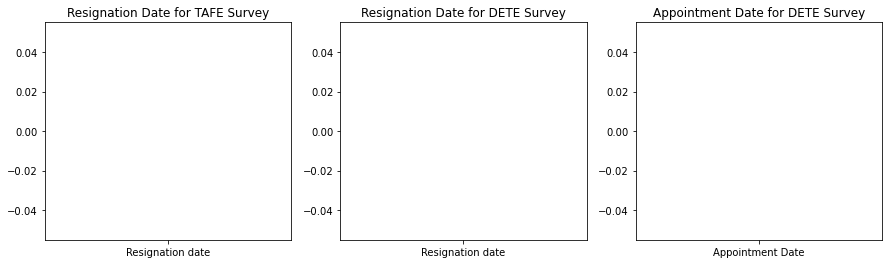

In [75]:
# Visualizing outliers for stop date column
fig = plt.figure(figsize = (15, 4))
ax = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax.boxplot(tafe_resignation['cease_date'])
ax.set_xticklabels(['Resignation date'])
ax.set_title('Resignation Date for TAFE Survey')

ax2.boxplot(dete_resignation['cease_date'])
ax2.set_xticklabels(['Resignation date'])
ax2.set_title('Resignation Date for DETE Survey')

ax3.boxplot(dete_resignation['dete_start_date'])
ax3.set_xticklabels(['Appointment Date'])
ax3.set_title('Appointment Date for DETE Survey')

plt.show()

The above box plots shows that:
- The 2009 resignation date is recognized as an outlier for the `tafe_survey`
- 50% of the resignation dates in `dete_survey` is in 2012. The number of resignations in 2006 and 2010 are too few and considered an outlier.
- The Start date for `dete_survey` is has a number of outlier between 1963 and 1982, with over 50% of appointments dates being between 1980 and 2005

Also, the above conclusions can be drawn based on our findings:

- The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their **years of service**.

You may have noticed that the `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

## Get the years of sercice for `dete_resignation` survey

In [76]:
# new column showing the years of service for DETE survey
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

# Quick view of the change we made
dete_resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


we created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment.Next, we'll identify any employees who resigned because they were dissatisfied.

## Create a column that explicitly show worker's dissatisfaction

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.
- **`tafe_survey_updated`**:

- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

- **`dete_survey_updated`**:

- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

To create the new column, we'll do the following:
1. Convert the values in the `Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` columns in the `tafe_resignations` dataframe to `True`, `False`, or `NaN` values.
2. If any of the columns listed above contain a `True` value, we'll add a `True` value to a new column named `dissatisfied`. To accomplish this, we'll use the [DataFrame.any() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.any.html) to do the following:
- Return `True` if any element in the selected columns above is `True`
- Return `False` if none of the elements in the selected columns above is `True`
- Return `NaN` if the value is `NaN`
![employee_exit](img/employee_exit.png)
Here's the syntax we can use:

**`df.any(axis=1, skipna=False)`**

After our changes, the new `dissatisfied` column will contain just the following values:

- `True`: indicates a person resigned because they were dissatisfied with the job
- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN`: indicates the value is missing

In [77]:
# Viewing the contributing factors column in tafe survey
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [78]:
# Viewing the contributing factors column in tafe survey
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [79]:
# create a funcion that update the values in a column
def update_val(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True

# Update tafe_resignation values in the specified columns and create a new column
tafe_resignation['dissatisfied'] = (tafe_resignation[['Contributing Factors. Dissatisfaction',
                                                      'Contributing Factors. Job Dissatisfaction']]
                                    .applymap(update_val)
                                    .any(1, skipna = False))

# create a copy of the result and avoid the SettingWithCopy Warning
tafe_resignations_up = tafe_resignation.copy()

# check if we got what we expected
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [80]:
# Values in thes columns are already in the boolean type 
dete_resignation['dissatisfied'] = (dete_resignation[['job_dissatisfaction',
                                                      'dissatisfaction_with_the_department',
                                                      'physical_work_environment',
                                                      'lack_of_recognition',
                                                      'lack_of_job_security',
                                                      'work_location',
                                                      'employment_conditions',
                                                      'work_life_balance',
                                                      'workload']]
                                   .any(1, skipna = False))

# create a copy of the result and avoid the SettingWithCopy Warning
dete_resignations_up = dete_resignation.copy()

# check if we got what we expected
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

Above, when working with the `tafe_resignation` datasets, we discovered that most of the values in the columns we needed to work with are represented with `-` which signifies that the respondent didn't resign due to job dissatisfaction. We updated this set of values to `False`, While updating the responses of `Job Dissatisfaction` in these columns to `True`, and mising values to `NaN`. We updated these values to a new column called `dissatisfied`, which now explicitly shows whether employees  that participated in `tafe_survey` left due to job dissatisfaction or not.

When working with `dete_resignation`, we observed that the columns we needed to work with already holds boolean values, so we didn't bother updating them. We just assigned a new column also named `dissatisfied` which explicitly shows whether employees that participated in `dete_survey` left due to job dissatisfaction or not.

We made these changes so that it will be easier to determine job dissatisfaction of employees, since all of these columns tries to measure job dissatisfaction in one way or another, if an employee tick `True` in at least on of the columns, then it is assumed that he due to job dissatisfation, but if he indicates `False` in all of the columns, then it means his resignation wasn't due to job dissatisfaction.

## Combining the DataSets

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new `institute_service` column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the `institute_service` column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [81]:
# add a column that holds all values as DETE 
dete_resignations_up['institute'] = 'DETE'

# add a column that holds all values as TAFE
tafe_resignations_up['institute'] = 'TAFE'

# Check our result for conformity
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service,dissatisfied,institute
3,6.341400e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341470e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),4-Mar,4-Mar,False,TAFE
5,6.341480e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),10-Jul,10-Jul,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),4-Mar,4-Mar,False,TAFE
7,6.341540e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 – 50,Permanent Full-time,Teacher (including LVT),4-Mar,4-Mar,False,TAFE


In [82]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [83]:
# Combine the two datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], sort = True, ignore_index=True)
combined

,Classification. Classification,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,CurrentAge. Current Age,Employment Type. Employment Type,Gender. What is your Gender?,Institute,WorkArea,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,classification,dete_start_date,disability,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,nesb,none_of_the_above,physical_work_environment,position,region,relocation,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,NaN,True,False,2012.0,Primary,2005.0,NaN,False,False,False,Permanent Full-time,Female,4.000000e+00,False,DETE,7,False,False,False,False,False,NaN,False,False,Teacher,Central Queensland,False,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-45,Education Queensland,True,False,2012.0,NaN,1994.0,NaN,False,True,True,Permanent Full-time,Female,6.000000e+00,False,DETE,18,False,False,False,False,True,NaN,False,False,Guidance Officer,Central Office,False,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,True,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Female,9.000000e+00,False,DETE,3,False,False,False,False,False,NaN,False,False,Teacher,North Queensland,False,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,NaN,False,False,2012.0,NaN,1997.0,NaN,True,True,False,Permanent Part-time,Female,1.000000e+01,False,DETE,15,True,True,False,False,False,NaN,False,False,Teacher Aide,NaN,False,NaN,2008.0,Resignation,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,False,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Male,1.200000e+01,False,DETE,3,False,False,False,False,True,NaN,False,False,Teacher,Far North Queensland,True,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Operational (OO),Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,-,21 – 25,Temporary Full-time,Male,Southern Queensland Institute of TAFE,Non-Delivery (corporate),NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,6.350660e+17,NaN,TAFE,6-May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-May,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,Teacher (including LVT),-,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,51-55,Temporary Full-time,Male,Barrier Reef Institute of TAFE,Delivery (teaching),NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,6.350670e+17,NaN,TAFE,2-Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-Jan,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,-,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,Southern Queensland Institute of TAFE,Non-Delivery (corporate),NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,6.

In [84]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
Classification.     Classification                     290
Employment Type.     Employment Type                   290
CurrentAge.     Current Age                            290
Gender.     What is your Gender?                       290
role_service                                           290
gender                                                 302
age                                                    3

## Clean the Column with mixed object types

Above we see that most columns have over 50% null values. This doesn't do justice to our analysis, hence we'll drop columns with less than 500 valid values.

In [85]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()
combined_updated

,cease_date,dissatisfied,id,institute,institute_service,separationtype
0,2012.0,False,4.000000e+00,DETE,7,Resignation
1,2012.0,True,6.000000e+00,DETE,18,Resignation
2,2012.0,False,9.000000e+00,DETE,3,Resignation
3,2012.0,True,1.000000e+01,DETE,15,Resignation
4,2012.0,False,1.200000e+01,DETE,3,Resignation
...,...,...,...,...,...,...
646,2013.0,False,6.350660e+17,TAFE,6-May,Resignation
647,2013.0,False,6.350670e+17,TAFE,2-Jan,Resignation
648,2013.0,False,6.350680e+17,TAFE,NaN,Resignation
649,2013.0,False,6.350700e+17,TAFE,6-May,Resignation


Above, we dropped rows with less than 500 valid vaues. This makes our analysis more valid.

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service` column.

In [86]:
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
2-Jan                 64
4-Mar                 63
6-May                 33
20-Nov                26
5.0                   23
1.0                   22
10-Jul                21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


This column is tricky to clean because it currently contains values in a couple different forms:
- some are purely strings
- some are purely floats
- some are in day-date format
- There are 88 missing values

To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Let's categorize the values in the `institute_service` column using the definitions above.

In [87]:
# First lets convert the column to a string object
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

# Create the pattern we'll like to extract
extract_years = r'(\d+)' # This extracts only digits in a string

# Next, lets extract the years from the institute_service column
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(extract_years)

# Convert the column back to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

# Verify our extraction
combined_updated['institute_service'].value_counts(dropna = False)

1.0     95
NaN     88
4.0     79
2.0     78
6.0     50
20.0    43
10.0    27
5.0     23
3.0     20
0.0     20
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
14.0     6
22.0     6
17.0     6
12.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
21.0     3
19.0     3
32.0     3
36.0     2
30.0     2
26.0     2
25.0     2
28.0     2
42.0     1
29.0     1
35.0     1
27.0     1
41.0     1
38.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In [88]:
# Let's see how our combined data looks like now
combined_updated

,cease_date,dissatisfied,id,institute,institute_service,separationtype
0,2012.0,False,4.000000e+00,DETE,7.0,Resignation
1,2012.0,True,6.000000e+00,DETE,18.0,Resignation
2,2012.0,False,9.000000e+00,DETE,3.0,Resignation
3,2012.0,True,1.000000e+01,DETE,15.0,Resignation
4,2012.0,False,1.200000e+01,DETE,3.0,Resignation
...,...,...,...,...,...,...
646,2013.0,False,6.350660e+17,TAFE,6.0,Resignation
647,2013.0,False,6.350670e+17,TAFE,2.0,Resignation
648,2013.0,False,6.350680e+17,TAFE,NaN,Resignation
649,2013.0,False,6.350700e+17,TAFE,6.0,Resignation


In [89]:
# Next we Create a function that maps each year value to one of the career stages above
def service_category(element):
    if element < 3:
        return 'New'
    elif (element > 3) and (element <= 6):
        return 'Experienced'
    elif (element >= 7) and (element <= 10):
        return 'Established'
    elif element > 11:
        return 'Veteran'
    elif pd.isnull(element):
        return np.nan
    
# Create a new column that shows the service Category
combined_updated['service_category'] = combined_updated['institute_service'].apply(service_category)

# Verify our action
combined_updated.head()

,cease_date,dissatisfied,id,institute,institute_service,separationtype,service_category
0,2012.0,False,4.0,DETE,7.0,Resignation,Established
1,2012.0,True,6.0,DETE,18.0,Resignation,Veteran
2,2012.0,False,9.0,DETE,3.0,Resignation,None
3,2012.0,True,10.0,DETE,15.0,Resignation,Veteran
4,2012.0,False,12.0,DETE,3.0,Resignation,None


In [90]:
combined_updated['service_category'].value_counts(dropna = False)

New            193
Experienced    152
Veteran        132
NaN            112
Established     62
Name: service_category, dtype: int64

we created a `service_category` column, that categorizes employees according to the amount of years spent in their workplace:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Now, let's finally do our first piece of analysis!

Recall that the `dissatisfied` column consists of `Boolean` values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat `Boolean` values as `integers`, so a `True` value is considered to be `1` and a `False` value is considered to be `0`. That means that we can aggregate the `dissatisfied` column and calculate the number of people in each group, the percentage of people in each group, etc.

Let's investigate the `dissatisfied` column:


In [91]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [92]:
# We'll replace the missing values with the most frequently occuring value 'False'
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

In [93]:
# Let's calculate the proportion of dissatisfied employees

dissatisfied_employees = combined_updated.pivot_table(index = 'service_category', values = 'dissatisfied')

# convert the calculated proportion to percentage
dissatisfied_employees['dissatisfied'] = round(dissatisfied_employees['dissatisfied'] * 100, 2)

# Let's view our analysis
dissatisfied_employees

,dissatisfied
service_category,
Established,51.61
Experienced,33.55
New,29.53
Veteran,48.48


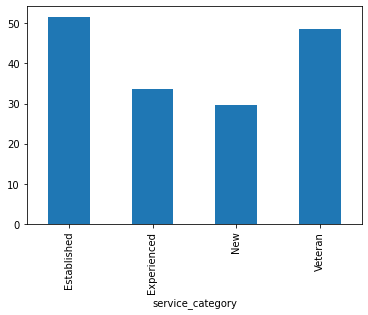

In [94]:
# Display the results in a bar chart
dissatisfied_employees.plot(kind = 'bar', legend = None)                                               
plt.show()

Above we found that Majority (About 52%) of **established employees** (who have spent at 7-10 working at the institute), left because they were dissatisfied.

Fewer (30%) **Experienced employees** (those who have spent 3-6 years working at the institutes) left due to dissatisfaction, in other words, majority under this category left due to some other reasons other than dissatisfaction.

Again Fewer (29%) number of **New employees** (those who have spent less than 3 years working at the institutes) left due to dissatisfaction, in other words, majority under this category left due to some other reasons other than dissatisfaction

About 50% of **veteran employees** (those eho have spent over 11 years working at the institutes) left due to dissatisfaction

In this project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), we completed the following tasks:

- Explored the data and figured out how to prepare it for analysis
- Corrected some of the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new `institute_service` column
- Cleaned the **Contributing Factors** columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Combined the data
- Cleaned the `institute_service` column
- Handled the missing values in the `dissatisfied` column
- Aggregated the data